In [22]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
from treatment import get_treated_data

In [23]:
X_train, X_test, y_train, y_test = get_treated_data()

In [49]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [50]:
y_pred = svm_model.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.9799382716049383


In [52]:
report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(report)

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1624
           1       0.96      1.00      0.98      1616

    accuracy                           0.98      3240
   macro avg       0.98      0.98      0.98      3240
weighted avg       0.98      0.98      0.98      3240



In [53]:
confusion_matrix_ = confusion_matrix(y_test, y_pred)

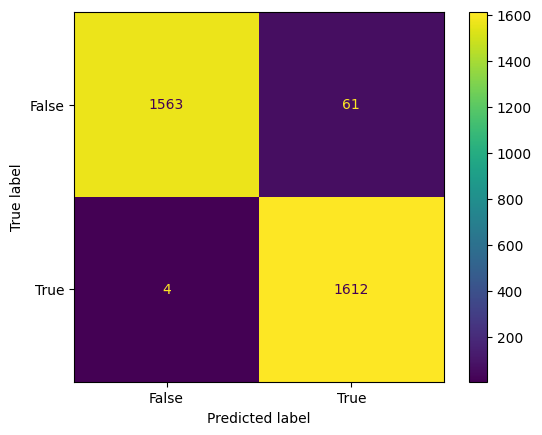

In [54]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])

cm_display.plot()
plt.show()

In [55]:
#Implementação do Grid Search

In [58]:
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

In [59]:
grid_search = GridSearchCV(svm_model, param_grid, refit = True, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=1)

In [60]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


Melhores parâmetros encontrados:
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [61]:
best_svm_model = grid_search.best_estimator_

In [62]:
best_svm_model.fit(X_train, y_train)

SVC(C=10, gamma=1)

In [63]:
grid_pred = best_svm_model.predict(X_test)

In [64]:
grid_accuracy = accuracy_score(y_test, grid_pred)
print("Acurácia do modelo:", grid_accuracy)

Acurácia do modelo: 0.9799382716049383


In [65]:
classification_rep = classification_report(y_test, grid_pred)
print("Relatório de classificação:")
print(classification_rep)

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1624
           1       0.96      1.00      0.98      1616

    accuracy                           0.98      3240
   macro avg       0.98      0.98      0.98      3240
weighted avg       0.98      0.98      0.98      3240



In [66]:
grid_confusion_matrix = confusion_matrix(y_test, grid_pred)

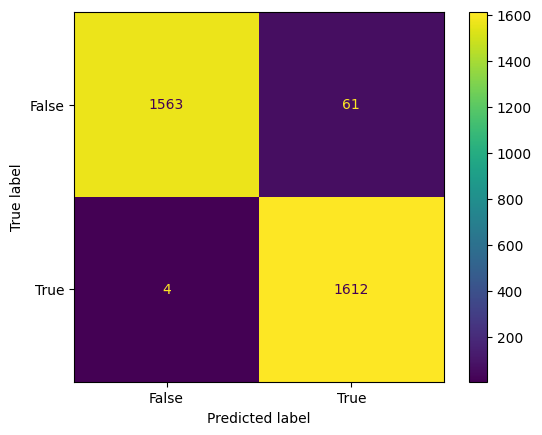

In [67]:
grid_cm_display = ConfusionMatrixDisplay(confusion_matrix = grid_confusion_matrix, display_labels = [False, True])

grid_cm_display.plot()
plt.show()

In [68]:
# test_text = "Congratulations! You've won a free vacation. Claim your prize now!"

# processed_test_text = finalpreprocess(test_text)

# print("Texto de teste após pré-processamento:", processed_test_text)

# prediction = best_decision_tree_model.predict(processed_test_text)

# if prediction[0]:
#     print("O texto é spam!")
# else:
#     print("O texto não é spam (ham)!")